## Importação e Pré-Processamento

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



### Importação

In [28]:
# Read the CSV file
df_train = pd.read_csv('dados_trabalho1/conjunto_de_treinamento.csv')
# Read the test CSV file
df_test = pd.read_csv('dados_trabalho1/conjunto_de_teste.csv')


In [29]:
df_train.describe()

,id_solicitante,produto_solicitado,dia_vencimento,tipo_endereco,idade,estado_civil,qtde_dependentes,grau_instrucao,nacionalidade,tipo_residencia,...,valor_patrimonio_pessoal,possui_carro,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,19464.000000,...,2.000000e+04,20000.000000,20000.000000,16903.000000,17022.000000,8486.000000,7140.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,1.284350,13.147250,1.006350,42.352500,2.120850,0.666400,0.0,0.961600,1.261303,...,2.095614e+03,0.339050,0.008900,8.045081,2.533310,3.708107,0.288095,581.295250,581.295250,0.500000
std,5773.647028,1.008239,6.748507,0.079435,14.930177,1.332004,1.236725,0.0,0.202305,0.883580,...,4.403344e+04,0.473399,0.388881,3.210790,1.532765,5.181241,0.944339,227.369798,227.369798,0.500013
min,1.000000,1.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,105.000000,0.000000
25%,5000.750000,1.000000,10.000000,1.000000,31.000000,1.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,444.000000,444.000000,0.000000
50%,10000.500000,1.000000,10.000000,1.000000,40.000000,2.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,596.000000,596.000000,0.500000
75%,15000.250000,1.000000,20.000000,1.000000,52.000000,2.000000,1.000000,0.0,1.000000,1.000000,...,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,728.000000,728.000000,1.000000
max,20000.000000,7.000000,25.000000,2.000000,106.000000,7.000000,53.000000,0.0,2.000000,5.000000,...,6.000000e+06,1.000000,32.000000,17.000000,5.000000,17.000000,5.000000,999.000000,999.000000,1.000000


### Verificação manual de atributos

<!-- É interessante verificar manualmente quais colunas não podem influenciar a variável inadimplência, pois não faz sentido ... Isso evita que o modelo perca processamento com colunas que não influenciam a variável alvo. -->


In [30]:
df_train.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

In [31]:
excluded_columns = ['id_solicitante' ]
df_train = df_train.drop(excluded_columns, axis=1)
df_test = df_test.drop(excluded_columns, axis=1)

### Codificação de atributos não numéricos


In [32]:

# Criar uma cópia dos dataframes originais
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# Identificar colunas do tipo String
string_columns = df_train.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
le = LabelEncoder()

# Codificar colunas do tipo String no dataframe de treino
for col in string_columns:
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])

# Codificar colunas do tipo String no dataframe de teste
for col in string_columns:
    df_test_encoded[col] = le.fit_transform(df_test_encoded[col])



### Verificar nulidades nos dados de teste.

In [33]:
# Verificar quais colunas têm valores nulos
null_columns_test = df_test_encoded.isnull().sum()
null_columns_test = null_columns_test[null_columns_test > 0]
print(null_columns_test)


tipo_residencia                125
meses_na_residencia            362
profissao                      762
ocupacao                       690
profissao_companheiro         2887
grau_instrucao_companheiro    3210
dtype: int64


In [34]:
if (not null_columns_test.empty):
    # Preencher valores nulos com a mediana das colunas
    df_test_encoded.fillna(df_test_encoded.median(), inplace=True)

# Verificar novamente se há valores nulos
null_columns_test_after = df_test_encoded.isnull().sum()
null_columns_test_after = null_columns_test_after[null_columns_test_after > 0]
print(null_columns_test_after)

Series([], dtype: int64)


### Verificação de colunas e linhas com null / NaN

In [35]:
# Verificar quais colunas têm valores nulos
null_columns = df_train_encoded.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)


tipo_residencia                 536
meses_na_residencia            1450
profissao                      3097
ocupacao                       2978
profissao_companheiro         11514
grau_instrucao_companheiro    12860
dtype: int64


In [36]:
# Filtrar apenas as colunas não nulas
non_null_columns = df_train_encoded.dropna(axis=1).columns

# DataFrame sem colunas nulas
df_no_null_columns = df_train_encoded.drop(columns=null_columns.index)

# Criar um DataFrame sem linhas com valores nulos
null_columns_to_drop = ['profissao_companheiro','grau_instrucao_companheiro']
df_no_null_rows = df_train_encoded.drop(columns=null_columns_to_drop).dropna()
df_test_no_null_rows = df_test_encoded.drop(columns=null_columns_to_drop).dropna()


### Selecionar dataSet

In [37]:
usingData = df_no_null_rows
usingTestData = df_test_no_null_rows

In [38]:
print(f'Shape:\nTreino: {usingData.shape}\nTeste:{usingTestData.shape}\n É esperado que o treino tenha uma variável a mais (alvo)')

Shape:
Treino: (15568, 39)
Teste:(5000, 38)
 É esperado que o treino tenha uma variável a mais (alvo)


### Discretizar valores float.


In [39]:
for colname in usingData.select_dtypes("float"):
    usingData[colname] = usingData[colname].astype(int)


In [40]:
discrete_features = usingData.dtypes == int
False in discrete_features

# Retorna False --> Todos os atributos sao discretos.

False

### MI Scores

In [41]:
# from sklearn.feature_selection import mutual_info_regression

# X = usingData.drop('inadimplente', axis = 1)
# y = usingData['inadimplente']

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(usingData, y, discrete_features)
# mi_scores


In [42]:
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(10, 15))
# plot_mi_scores(mi_scores)


### Dividindo e Normalizando

In [43]:
from sklearn.model_selection import train_test_split

X = usingData.drop('inadimplente', axis = 1)
y = usingData['inadimplente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Normalized input data(X):\n", X_train_scaled)


Normalized input data(X):
 [[-0.28045994 -0.45084987  0.9803593  ...  1.62252052  0.88493984
   0.88493984]
 [-0.28045994  0.29174182 -2.4319925  ... -0.34039149 -0.01868156
  -0.01868156]
 [-0.28045994  1.77692521  0.9803593  ...  0.96821651  0.91178008
   0.91178008]
 ...
 [-0.28045994 -0.45084987 -0.7258166  ... -0.99469549 -0.09472891
  -0.09472891]
 [-0.28045994  0.29174182  0.9803593  ...  1.62252052 -0.60469346
  -0.60469346]
 [-0.28045994  0.29174182 -0.7258166  ...  0.96821651  0.44207589
   0.44207589]]


## Treino e predicao usando:

#### Using SMOTE with XGBoost Classifier

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

X_blc, y_blc = SMOTE().fit_resample(X_train_scaled, y_train)
xgb = XGBClassifier()



In [46]:
## Busca por parametros

# # Define the hyperparameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300, 800,850],    
#     'learning_rate': [0.01, 0.001, 0.1, 0.2],   
#     'max_depth': [3, 4, 5,6],              
# }


# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)

# grid_search.fit(X_blc, y_blc) # Demorou 2 min e 22s



In [47]:
bestXgbModel = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None)


In [48]:
bestXgbModel.fit(X_blc, y_blc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred = bestXgbModel.predict(X_test_scaled)


In [50]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)


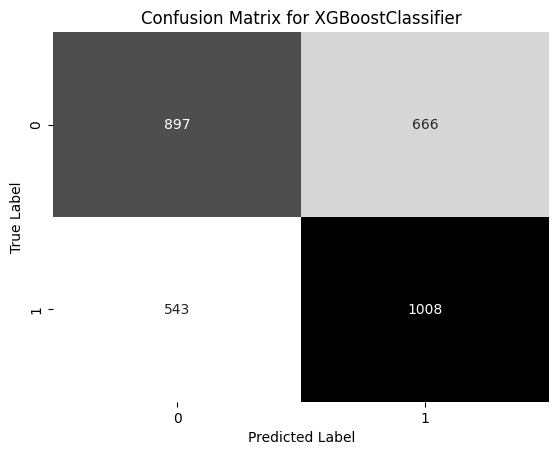

In [51]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [52]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for XGBoostClassifier:')
print(classification_rep)



Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.62      0.57      0.60      1563
           1       0.60      0.65      0.63      1551

    accuracy                           0.61      3114
   macro avg       0.61      0.61      0.61      3114
weighted avg       0.61      0.61      0.61      3114

